In [1]:
# install library kaggle
!pip install -q kaggle

In [2]:
# upload kaggle.json yang sudah di download
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadrafiqpohan","key":"14e22861a7d40105acc33ff2c220bc21"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset
!kaggle datasets download -d sayankr007/cyber-bullying-data-for-multi-label-classification

Dataset URL: https://www.kaggle.com/datasets/sayankr007/cyber-bullying-data-for-multi-label-classification
License(s): MIT


In [5]:
# ekstrak dataset
!unzip cyber-bullying-data-for-multi-label-classification

Archive:  cyber-bullying-data-for-multi-label-classification.zip
  inflating: Data_Distribution.png   
  inflating: final_hateXplain.csv    
  inflating: hateXplain.csv          


In [15]:
# import dataset
import pandas as pd

df = pd.read_csv('/content/hateXplain.csv')
df.sample(3)

,post_id,annotator_id,label,target,post_tokens
42728,13218655_gab,211,normal,NaN,was called a nazi once at a social gathering s...
7202,1179095573984694273_twitter,10,offensive,Homosexual,i will never ever understand queer people who ...
58539,6683255_gab,211,normal,NaN,<user> it seems that once a city becomes entir...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60444 entries, 0 to 60443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       60444 non-null  object
 1   annotator_id  60444 non-null  int64 
 2   label         60444 non-null  object
 3   target        39252 non-null  object
 4   post_tokens   60444 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [17]:
df['label'].value_counts()

,count
label,
normal,24449
hatespeech,18070
offensive,17925


In [18]:
df.isna().sum()

,0
post_id,0
annotator_id,0
label,0
target,21192
post_tokens,0


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
data = df.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [21]:
df['label'] = df['label'].map({'normal': 0, 'offensive': 1, 'hatespeech': 2})
df['label'].value_counts()

,count
label,
0,24449
2,18070
1,17925


In [22]:
# Import liblary
import warnings
warnings.filterwarnings("ignore")
import nltk, re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
# nltk.download()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
!pip install clean-text unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=6632b79bbcbc4af3d93f5f22f7bb14e955219649cc3ba13df1fd0a22370f4057
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji


In [24]:
# Cleaning text
from cleantext import clean

# Menghapus Emoji
def remove_emoji(text):
  text = clean(text, no_emoji=True)
  return text

# Menghapus karakter
def clean_text(text):
  text = re.sub(r"\\n|w+:|@\w+|(@\[A-Za-z0-9]+)|\d+|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?'", ' ', text)
  return text

# Mengubah menjadi huruf kecil
def lower(text):
  return text.lower()

def tokenize(d):
    return word_tokenize(d)

In [27]:
# ubah teks menjadi lowercase
undercase = df.copy()
undercase['Text_Lower'] = undercase['post_tokens'].apply(lower)
undercase = undercase.drop(columns='post_tokens')
undercase.tail(10)

,post_id,annotator_id,label,target,Text_Lower
60434,9990225_gab,231,0,NaN,when i first got on here and said i hate trump...
60435,9991681_gab,206,1,Islam,was macht der moslem wenn der zion gegen seine...
60436,9991681_gab,203,0,Other,was macht der moslem wenn der zion gegen seine...
60437,9991681_gab,211,0,NaN,was macht der moslem wenn der zion gegen seine...
60438,9992513_gab,209,2,Hispanic,it is awful look at world demographics asians ...
60439,9992513_gab,253,2,Asian,it is awful look at world demographics asians ...
60440,9992513_gab,222,1,Asian,it is awful look at world demographics asians ...
60441,9998729_gab,200,2,"African, Islam",the jewish globalist elite have only imported ...
60442,9998729_gab,202,1,"Islam, Jewish",the jewish globalist elite have only imported ...
60443,9998729_gab,207,1,"African, Islam, Jewish",the jewish globalist elite have only imported ...


In [31]:
kamus = pd.read_csv('/content/slangs.csv')
kamus.drop(columns='Unnamed: 0', inplace=True)
kamus.head()

,Abbr,Fullform
0,Slag,Meaning
1,#1,Number one
2,$,Dollar
3,$_$,Has money
4,%),Drunk


In [33]:
# Buat dictionary dari kamus slang
slang_dict = pd.Series(kamus['Fullform'].values, index=kamus['Abbr']).to_dict()

# Fungsi untuk menggantikan kata slang dengan kata formal
def replace_slang(text, slang_dict):
    words = text.split()
    replaced_text = ' '.join([slang_dict.get(word, word) for word in words])
    return replaced_text

In [34]:
normalisasi = undercase.copy()
normalisasi['Text_Formal'] = normalisasi['Text_Lower'].apply(lambda x: replace_slang(x, slang_dict))
normalisasi = normalisasi.drop(columns='Text_Lower')
normalisasi.tail(10)

,post_id,annotator_id,label,target,Text_Formal
60434,9990225_gab,231,0,NaN,when i first got on here and said i hate trump...
60435,9991681_gab,206,1,Islam,was macht der moslem wenn der zion gegen seine...
60436,9991681_gab,203,0,Other,was macht der moslem wenn der zion gegen seine...
60437,9991681_gab,211,0,NaN,was macht der moslem wenn der zion gegen seine...
60438,9992513_gab,209,2,Hispanic,it is awful look at world demographics asians ...
60439,9992513_gab,253,2,Asian,it is awful look at world demographics asians ...
60440,9992513_gab,222,1,Asian,it is awful look at world demographics asians ...
60441,9998729_gab,200,2,"African, Islam",the jewish globalist elite have only imported ...
60442,9998729_gab,202,1,"Islam, Jewish",the jewish globalist elite have only imported ...
60443,9998729_gab,207,1,"African, Islam, Jewish",the jewish globalist elite have only imported ...


In [36]:
# Implementasi cleaning teks
cleaning = df.copy()
cleaning['Text_Cleaning'] = cleaning['post_tokens'].apply(remove_emoji).apply(clean_text)
cleaning = cleaning.drop(columns='post_tokens')
cleaning.head(10)

,post_id,annotator_id,label,target,Text_Cleaning
0,1179055004553900032_twitter,1,0,NaN,i dont think im getting my baby them white h...
1,1179055004553900032_twitter,2,0,NaN,i dont think im getting my baby them white h...
2,1179055004553900032_twitter,3,0,NaN,i dont think im getting my baby them white h...
3,1179063826874032128_twitter,1,0,NaN,we cannot continue calling ourselves feminists...
4,1179063826874032128_twitter,2,0,NaN,we cannot continue calling ourselves feminists...
5,1179063826874032128_twitter,3,0,NaN,we cannot continue calling ourselves feminists...
6,1178793830532956161_twitter,4,0,African,nawt yall niggers ignoring me
7,1178793830532956161_twitter,2,0,NaN,nawt yall niggers ignoring me
8,1178793830532956161_twitter,3,2,African,nawt yall niggers ignoring me
9,1179088797964763136_twitter,1,2,Asian,user i am bit confused coz chinese ppl can n...


In [37]:
# Tokenizing
def tokenize(d):
    return word_tokenize(d)

# Implementasi tokenizing
tokenizing = cleaning.copy()
tokenizing['Text_Tokenize'] = tokenizing['Text_Cleaning'].apply(tokenize)
tokenizing.drop(columns='Text_Cleaning', inplace=True)
tokenizing.head()

,post_id,annotator_id,label,target,Text_Tokenize
0,1179055004553900032_twitter,1,0,NaN,"[i, dont, think, im, getting, my, baby, them, ..."
1,1179055004553900032_twitter,2,0,NaN,"[i, dont, think, im, getting, my, baby, them, ..."
2,1179055004553900032_twitter,3,0,NaN,"[i, dont, think, im, getting, my, baby, them, ..."
3,1179063826874032128_twitter,1,0,NaN,"[we, can, not, continue, calling, ourselves, f..."
4,1179063826874032128_twitter,2,0,NaN,"[we, can, not, continue, calling, ourselves, f..."


In [41]:
# Remove stopword/Filtering
def remove_stopwords(text):
    filtered_words = [word for word in text if word not in stopwords.words('english')]
    return filtered_words

# Implementasi remove stopword
filtering = tokenizing.copy()
filtering['Remove_Stopword'] = filtering['Text_Tokenize'].apply(remove_stopwords)
filtering.drop(columns='Text_Tokenize', inplace=True)
filtering.head()

,post_id,annotator_id,label,target,Remove_Stopword
0,1179055004553900032_twitter,1,0,NaN,"[dont, think, im, getting, baby, white, two, w..."
1,1179055004553900032_twitter,2,0,NaN,"[dont, think, im, getting, baby, white, two, w..."
2,1179055004553900032_twitter,3,0,NaN,"[dont, think, im, getting, baby, white, two, w..."
3,1179063826874032128_twitter,1,0,NaN,"[continue, calling, feminists, rights, womxn, ..."
4,1179063826874032128_twitter,2,0,NaN,"[continue, calling, feminists, rights, womxn, ..."


In [43]:
# Install liblary sastrawi
!pip install Sastrawi
import nltk
from nltk.corpus import stopwords

In [46]:
from nltk.stem import PorterStemmer

# Buat objek PorterStemmer
ps = PorterStemmer()

# Fungsi stemming
def stemming(text_tokens):
    return [ps.stem(word) for word in text_tokens]

# Implementasi stemming
stemming_result = filtering.copy()
stemming_result['Stemming'] = stemming_result['Remove_Stopword'].apply(stemming)
stemming_result.drop(columns='Remove_Stopword', inplace=True)
stemming_result.head()


,post_id,annotator_id,label,target,Stemming
0,1179055004553900032_twitter,1,0,NaN,"[dont, think, im, get, babi, white, two, white..."
1,1179055004553900032_twitter,2,0,NaN,"[dont, think, im, get, babi, white, two, white..."
2,1179055004553900032_twitter,3,0,NaN,"[dont, think, im, get, babi, white, two, white..."
3,1179063826874032128_twitter,1,0,NaN,"[continu, call, feminist, right, womxn, arent,..."
4,1179063826874032128_twitter,2,0,NaN,"[continu, call, feminist, right, womxn, arent,..."


In [45]:
# Implementasi stemming
stemming_result = filtering.copy()
stemming_result['Stemming'] = stemming_result['Remove_Stopword'].apply(stemming)
stemming_result.drop(columns='Remove_Stopword', inplace=True)
stemming_result.head()

KeyboardInterrupt: 

In [47]:
# Menggabungkan kata menjadi kalimat
text = []
for i in range(len(stemming_result['Stemming'])):
  text.insert(i, ' '.join(stemming_result['Stemming'][i]))

In [48]:
# Proses dan hasil ubah kata menjadi kalimat
data_text = stemming_result.drop(columns='Stemming')
data_text['Text'] = text
data_text.head()

,post_id,annotator_id,label,target,Text
0,1179055004553900032_twitter,1,0,NaN,dont think im get babi white two white j nike ...
1,1179055004553900032_twitter,2,0,NaN,dont think im get babi white two white j nike ...
2,1179055004553900032_twitter,3,0,NaN,dont think im get babi white two white j nike ...
3,1179063826874032128_twitter,1,0,NaN,continu call feminist right womxn arent addres...
4,1179063826874032128_twitter,2,0,NaN,continu call feminist right womxn arent addres...


In [49]:
data_labeling = data_text.copy()
# data_labeling['Score'] = data_labeling['Score'].map({1: 'Negatif', 2: 'Negatif', 3: 'Positif', 4: 'Positif', 5: 'Positif'})
# data_labeling = data_labeling.rename(columns={'Score':'Sentiment'})
data_labeling

,post_id,annotator_id,label,target,Text
0,1179055004553900032_twitter,1,0,NaN,dont think im get babi white two white j nike ...
1,1179055004553900032_twitter,2,0,NaN,dont think im get babi white two white j nike ...
2,1179055004553900032_twitter,3,0,NaN,dont think im get babi white two white j nike ...
3,1179063826874032128_twitter,1,0,NaN,continu call feminist right womxn arent addres...
4,1179063826874032128_twitter,2,0,NaN,continu call feminist right womxn arent addres...
...,...,...,...,...,...
60439,9992513_gab,253,2,Asian,aw look world demograph asian fuck everywher a...
60440,9992513_gab,222,1,Asian,aw look world demograph asian fuck everywher a...
60441,9998729_gab,200,2,"African, Islam",jewish globalist elit import million muslim mu...
60442,9998729_gab,202,1,"Islam, Jewish",jewish globalist elit import million muslim mu...


In [50]:
data_labeling['label'].value_counts()

,count
label,
0,24449
2,18070
1,17925


In [ ]:
# # Melakukan label encoder
# from sklearn import preprocessing

# lb = preprocessing.LabelEncoder()
# data_labeling['Label'] = lb.fit_transform(data_labeling['Sentiment'])
# data_labeling.head()

In [51]:
X = data_labeling['Text'].values
y = data_labeling['label']

In [52]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan (70%) dan data sisa (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagi data sisa menjadi data testing (70%) dan data validation (30%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [53]:
print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data testing: {len(X_test)}')
print(f'Jumlah data validation: {len(X_val)}')

Jumlah data training: 42310
Jumlah data testing: 9067
Jumlah data validation: 9067


In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Inisialisasi objek Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='[UNK]')  # MAX_NUM_WORDS adalah jumlah kata unik yang akan digunakan

# Fitting Tokenizer pada teks pelatihan
tokenizer.fit_on_texts(X)

# Mengonversi teks ke token numerik dan melakukan padding
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Melakukan padding sequence
X_train_padded = pad_sequences(X_train_seq)  # maxlen=MAX_SEQUENCE_LENGTH adalah panjang maksimal sekuens yang diizinkan
X_test_padded = pad_sequences(X_test_seq)
X_val_padded = pad_sequences(X_val_seq)

In [55]:
X_train[1]

'anoth sand nigger'

In [56]:
X_train_padded[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 100,   5],
      dtype=int32)

In [57]:
tokenizer.index_word

{1: '[UNK]',
 2: 'user',
 3: 'white',
 4: 'number',
 5: 'nigger',
 6: 'like',
 7: 'fuck',
 8: 'peopl',
 9: 'muslim',
 10: 'get',
 11: 'women',
 12: 'jew',
 13: 'retard',
 14: 'black',
 15: 'bitch',
 16: 'one',
 17: 'rape',
 18: 'kike',
 19: 'go',
 20: 'say',
 21: 'ghetto',
 22: 'hate',
 23: 'immigr',
 24: 'faggot',
 25: 'want',
 26: 'would',
 27: 'call',
 28: 'shit',
 29: 'gay',
 30: 'know',
 31: 'make',
 32: 'think',
 33: 'countri',
 34: 'right',
 35: 'kill',
 36: 'us',
 37: 'look',
 38: 'need',
 39: 'refuge',
 40: 'time',
 41: 'nigga',
 42: 'trump',
 43: 'even',
 44: 'men',
 45: 'illeg',
 46: 'nazi',
 47: 'see',
 48: 'violenc',
 49: 'moslem',
 50: 'got',
 51: 'use',
 52: 'ass',
 53: 'islam',
 54: 'good',
 55: 'love',
 56: 'take',
 57: 'let',
 58: 'never',
 59: 'realli',
 60: 'tri',
 61: 'asian',
 62: 'back',
 63: 'come',
 64: 'man',
 65: 'queer',
 66: 'u',
 67: 'lol',
 68: 'girl',
 69: 'year',
 70: 'thing',
 71: 'day',
 72: 'still',
 73: 'everi',
 74: 'way',
 75: 'said',
 76: 'live',

In [58]:
# Membuat arsitektur model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=True
)

checkpoint_path = 'model_checkpoints/best_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [60]:
op = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(X_train_padded, y_train,
                    validation_data=(X_val_padded, y_val),
                    epochs=5, batch_size=128,
                    callbacks=[checkpoint, early_stop])

Epoch 1/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.3022 - loss: 1.2872
Epoch 1: val_loss did not improve from -24.81029
331/331 ━━━━━━━━━━━━━━━━━━━━ 212s 639ms/step - accuracy: 0.3022 - loss: 1.2777 - val_accuracy: 0.3720 - val_loss: -10.7887
Epoch 2/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.3810 - loss: -16.5483
Epoch 2: val_loss improved from -24.81029 to -25.70006, saving model to model_checkpoints/best_model.weights.h5
331/331 ━━━━━━━━━━━━━━━━━━━━ 259s 631ms/step - accuracy: 0.3810 - loss: -16.5624 - val_accuracy: 0.3470 - val_loss: -25.7001
Epoch 3/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.3618 - loss: -30.8917
Epoch 3: val_loss improved from -25.70006 to -32.44380, saving model to model_checkpoints/best_model.weights.h5
331/331 ━━━━━━━━━━━━━━━━━━━━ 262s 632ms/step - accuracy: 0.3617 - loss: -30.8956 - val_accuracy: 0.3003 - val_loss: -32.4438
Epoch 4/5
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.3398 - loss: -36.5039


In [63]:
# Membuat plot loss dan akurasi pada training dan validation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'b')
  val_acc_plot, = plt.plot(epochs, val_acc, 'r')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'b')
  val_loss_plot, = plt.plot(epochs, val_loss, 'r')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,5))
  plot_acc(history)
  plot_loss(history)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

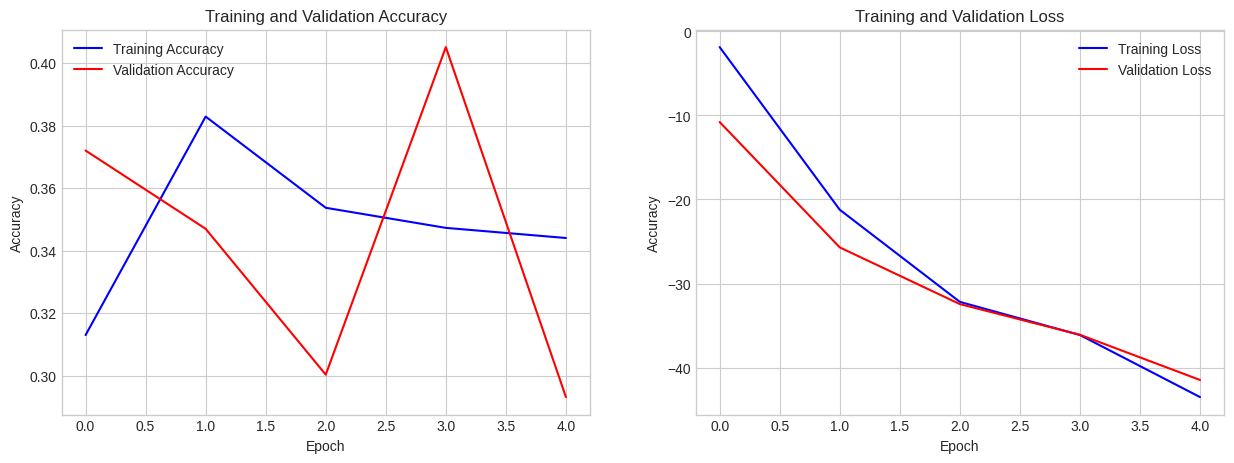

In [64]:
# Hasil visualisasi
plot_history(history)

In [65]:
model.load_weights('/content/model_checkpoints/best_model.weights.h5')

In [66]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

284/284 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.2955 - loss: -38.3695
Test Loss: -38.024444580078125
Test Accuracy: 0.29414358735084534


In [67]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)

# Menghasilkan laporan klasifikasi
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

284/284 ━━━━━━━━━━━━━━━━━━━━ 26s 88ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3716
           1       0.29      1.00      0.45      2667
           2       0.00      0.00      0.00      2684

    accuracy                           0.29      9067
   macro avg       0.10      0.33      0.15      9067
weighted avg       0.09      0.29      0.13      9067



In [68]:
no_spam = data_labeling[data_labeling['label'] == 0]
spam = data_labeling[data_labeling['label'] == 1]

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

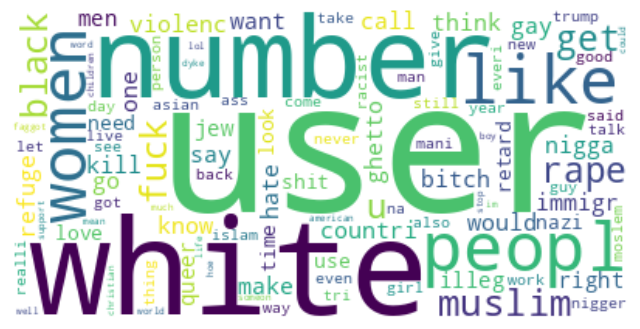

In [69]:
# Menampilkan 100 kata positif
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
query_words={'#'}
stop_words.update(query_words)

for word in query_words:
    no_spam.Text = no_spam.Text.str.replace(word, '')
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(
    stopwords=stop_words,
    collocations=False,
    max_words=100,
    background_color="white")
wc.generate(' '.join(no_spam.Text))
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

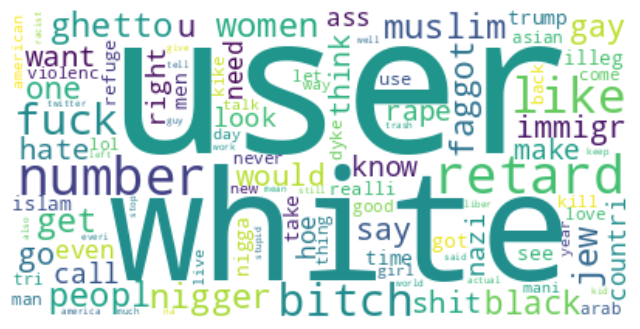

In [70]:
# Menampilkan 100 kata positif
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
query_words={'#'}
stop_words.update(query_words)

for word in query_words:
    spam.Text = spam.Text.str.replace(word, '')
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(
    stopwords=stop_words,
    collocations=False,
    max_words=100,
    background_color="white")
wc.generate(' '.join(spam.Text))
plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")